# Predicting Thyroid Cancer Recurrence using Logistic Regression

## Hina Ali (FA21-BSI-020)

## Cleaning the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv("Thyroid_Diff.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
len(data)

383

In [4]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [5]:
gender_num = {'M': 0, 'F': 1}
data['Gender'] = data['Gender'].map(gender_num)

val = {'No': 0, 'Yes': 1}
data['Smoking'] = data['Smoking'].map(val)
data['Hx Smoking'] = data['Hx Smoking'].map(val)
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].map(val)
data['Recurred'] = data['Recurred'].map(val)

val2= {'Uni-Focal':0, 'Multi-Focal':1}
data['Focality'] = data['Focality'].map(val2)
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,0,Low,T1a,N0,M0,I,Indeterminate,0
1,34,1,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
2,30,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
3,62,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
4,62,1,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0


C:\Users\PMYLS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

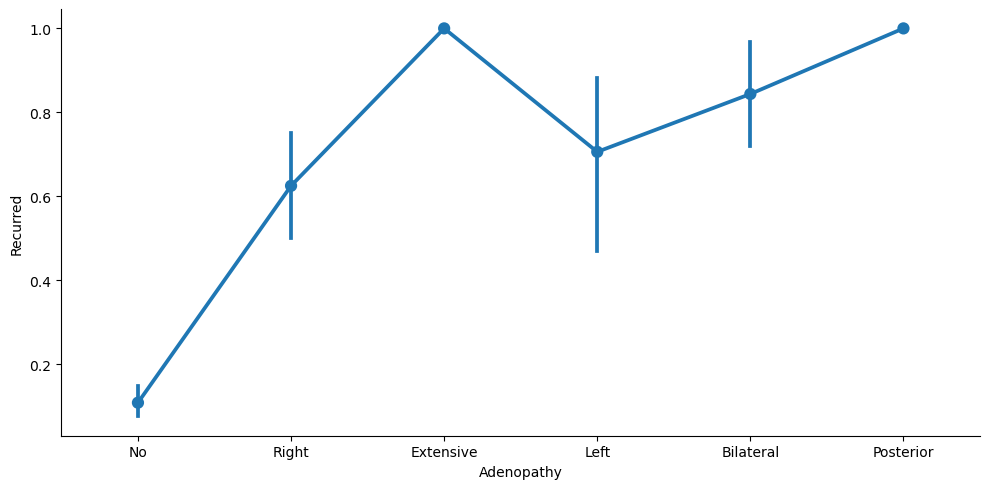

In [6]:
for i, col in enumerate(['Adenopathy']): 
    plt.figure(i)
    sns.catplot(x=col, y='Recurred', data=data, kind='point', aspect=2)

In [7]:
res = {'Indeterminate':1, 'Excellent':0, 'Structural Incomplete':3,
 'Biochemical Incomplete':2}
data['Response']=data['Response'].map(res)
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,0,Low,T1a,N0,M0,I,1,0
1,34,1,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,0,0
2,30,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,0,0
3,62,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,0,0
4,62,1,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,0,0


In [8]:
ade = {'No':0, 'Right':1, 'Extensive':5, 'Left':2, 'Bilateral':3, 'Posterior':4}
data['Adenopathy']=data['Adenopathy'].map(ade)

In [9]:
M = {'M0': 0, 'M1': 1}
data['M'] = data['M'].map(M)
N = {'N0': 0, 'N1b': 2, 'N1a':1}
data['N'] = data['N'].map(N)
T = {'T1a':1, 'T1b':2, 'T2':3, 'T3a':4, 'T3b':5, 'T4a':6, 'T4b':7}
data['T'] = data['T'].map(T)
risk = {'Low': 0, 'Intermediate': 1, 'High':2}
data['Risk'] = data['Risk'].map(risk)
val3 = {'Micropapillary':0, 'Papillary':2, 'Follicular':3, 'Hurthel cell':1}
data['Pathology'] = data['Pathology'].map(val3)

stage={'I':1, 'II':2, 'IVB':4.2, 'III':3, 'IVA':4.1}
data['Stage'] = data['Stage'].map(stage)

In [10]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,Euthyroid,Single nodular goiter-left,0,0,0,0,1,0,0,1.0,1,0
1,34,1,0,1,0,Euthyroid,Multinodular goiter,0,0,0,0,1,0,0,1.0,0,0
2,30,1,0,0,0,Euthyroid,Single nodular goiter-right,0,0,0,0,1,0,0,1.0,0,0
3,62,1,0,0,0,Euthyroid,Single nodular goiter-right,0,0,0,0,1,0,0,1.0,0,0
4,62,1,0,0,0,Euthyroid,Multinodular goiter,0,0,1,0,1,0,0,1.0,0,0


In [11]:
data=data.drop('Thyroid Function',axis=1)
data=data.drop('Physical Examination',axis=1)
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,0,0,0,0,1,0,0,1.0,1,0
1,34,1,0,1,0,0,0,0,0,1,0,0,1.0,0,0
2,30,1,0,0,0,0,0,0,0,1,0,0,1.0,0,0
3,62,1,0,0,0,0,0,0,0,1,0,0,1.0,0,0
4,62,1,0,0,0,0,0,1,0,1,0,0,1.0,0,0


## Splitting the data

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
features = data.drop('Recurred', axis=1)
labels = data['Recurred']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.2


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [16]:
# is used to chain multiple processing steps together
pipeline = Pipeline([ 
    ('scaler', StandardScaler()), #This scaler standardizes features by removing the mean and scaling to unit variance.
    ('classifier', LogisticRegression()) #helps prevent overfitting by penalizing large coefficients & promoting smoother models.
])

In [17]:
param_dist = {
    'classifier__C': uniform(0.1, 10.0),  # The C parameter represents how much we want to avoid overfitting
    'classifier__penalty': ['l2']
}

In [18]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

In [19]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=100,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A6EB0C8A10>,
                                        'classifier__penalty': ['l2']},
                   random_state=42)

In [21]:
#model evaluation
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Best parameters found:  {'classifier__C': 0.30584494295802445, 'classifier__penalty': 'l2'}
Best cross-validation score: 0.96


In [22]:
y_pred=random_search.predict(X_test)

In [23]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Evaluating the model

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.987012987012987
Confusion Matrix:
[[58  0]
 [ 1 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



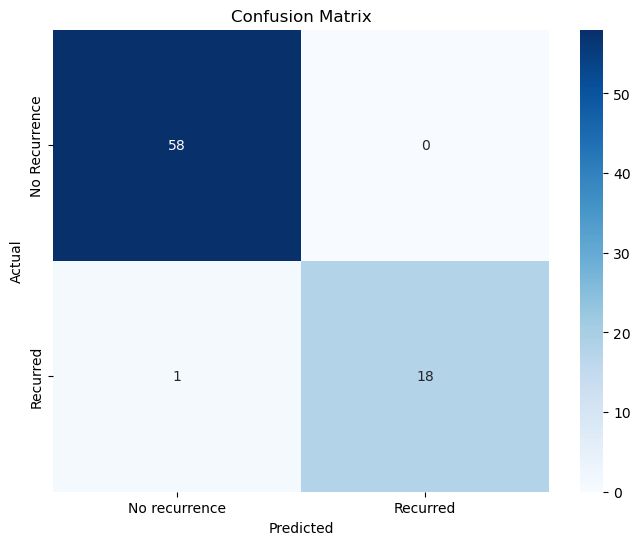

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No recurrence', 'Recurred'], yticklabels=['No Recurrence', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()